**Nombre:** Leslie Díaz
# PROYECTO DE I BIMESTRE DE PYTHON
#### Índice
* Introducción
* Desarrollo
* Conclusiones
* Bibliografia

# INDRODUCCIÓN

El conjunto de datos escogido corresponde a los reportes de homicidios y asesinatos en Estados Unidos entre 1980 a 2014. Esta información esta disponible desde el portal [Kaggle.com](https://www.kaggle.com/murderaccountability/homicide-reports/data) siendo compilados y puestos a disposición por "The Murder Accountability Project", fundado por Thomas Hargrove.

La información que se describe en el conjunto de datos corresponde a las caracteristicas de las victimas y perpetradores tales como edad, la raza, el sexo, el origen étnico, además de la relación entre la víctima y el autor y el arma utilizada siendo estas de gran importancia a la hora de analizar la frecuencia de ocurrencias en base a dichas caracteristicas.

### Objetivo:
* Analizar el conjunto de datos seleccionado mediante la utilización de librerias en Python para la obtencion de información, estadisticas y sus respectivas graficas a raiz de dicha información

### Información sobre el conjunto de datos:

**Numero de columnas:** 24

**Nombre de las columnas:** 
* Record ID
* Agency Code
* Agency Name
* Agency Type
* City
* State
* Year
* Month
* Incident
* Crime Type
* Crime Solved
* Victim Sex
* Victim Age
* Victim Race
* Victim Ethnicity
* Perpetrator Sex
* Perpetrator Age
* Perpetrator Race
* Perpetrator Ethnicity
* Relationship
* Weapon
* Victim Count
* Perpetrator Count
* Record Source

**Numero de registros:** 638454

**Columnas que se van a utilizada:**
* State
* Year
* Crime Type
* Crime Solved
* Victim Sex
* Victim Age
* Perpetrator Sex
* Perpetrator Age
* Relationship
* Weapon

### Definiciones importantes:
* **Asesinato.-** Matar a alguien con alevosía, ensañamiento o por una recompensa. [3]
* **Homicidio.-** Delito consistente en matar a alguien sin que concurran las circunstancias de alevosía, precio o ensañamiento. [3]
* **Homicidio por negligencia.-** El homicidio negligente, también llamado homicidio culposo o involuntario, es un delito que consiste en causar la muerte a una persona física por una acción negligente. 

Existen diversas formas de homicidio negligente:
* Cuando se realiza una acción de la cual se conoce el posible resultado de muerte y sin embargo se cree poder evitarlo, pero falla y ésta se produce.
* Cuando definitivamente se ignora que la acción que se va a llevar a cabo puede producir la muerte de la persona. [2]


# DESARROLLO

Importar librerias necesarias para la ejecución del código

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
paleta = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
papaleta = ["#ffac81", "#ff928b", "#fec3a6", "#efe9ae", "#cdeac0", "#e0607e"]

Se definen las columnas a utilizar, la ruta del archivo y se procede a leer el archivo de la ruta. Debido a la gran cantidad de registros se utilizará únicamente 50000 de estos.

In [2]:
path_dataset = "L://Familia//Documents//2019B-OCTAVOSEMESTRE//Python//py-diaz-yanangomez-leslie-mishell//informe-homicidios-asesinatos//dataset-homicidios.csv"
columnas = ["State", 
            "Year", 
            "Month",
            "Crime Type",
            "Crime Solved",
            "Victim Sex",
            "Victim Age",
            "Victim Race",
            "Victim Ethnicity",
            "Perpetrator Sex",
            "Perpetrator Age",
            "Perpetrator Race",
            "Perpetrator Ethnicity",
            "Relationship",
            "Weapon"]

dataframe = pd.read_csv(path_dataset,
                        nrows = 50000,
                        usecols = columnas)

## Análisis de datos

### Estados con la mayor cantidad de casos de homicidios/asesinatos reportados en EEUU

California    9451
Texas         4695
Florida       4280
New York      4015
Illinois      2544
Name: State, dtype: int64


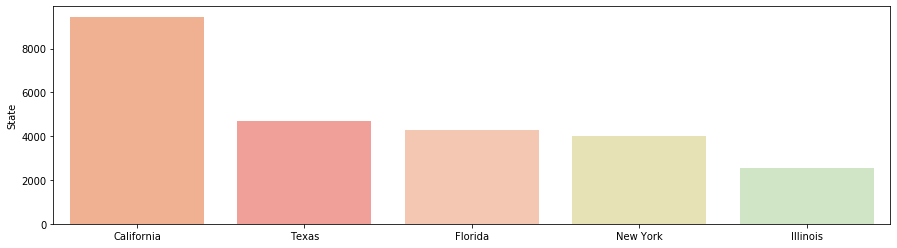

In [3]:
estado = dataframe["State"].value_counts().head(5)# En EEUU
f,ax = plt.subplots(1,1,figsize=(15,4))
print(estado)
ax = sns.barplot(estado.index, estado,palette=papaleta)

**Resultados**: Como se observa en el grafico de barras, el estado que posee un mayor numero de reportes entre homicidios y asesinatos es California con un total de 9451 reportes de crímenes y corresponde al 18.9% del total de casos. Es seguido por Texas con el 9,39% y Florida (8,56%). 

### Años donde se reportaron mayor cantidad de casos de homicidios/asesinatos

1980    23092
1981    21208
1982     5700
Name: Year, dtype: int64


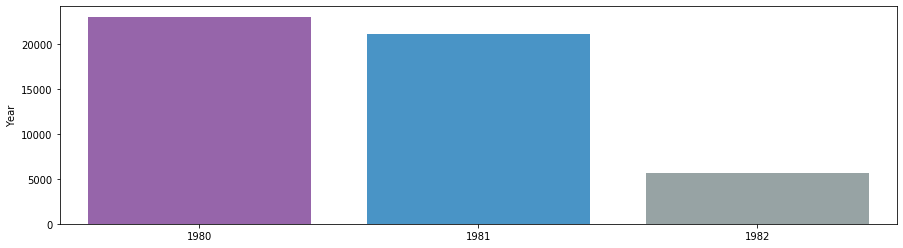

In [4]:
anio =  dataframe["Year"].value_counts().head(5)
f,ax = plt.subplots(1,1,figsize=(15,4))
print(anio)
ax = sns.barplot(anio.index, anio,palette=paleta)

**Resultados**: Como se observa en el grafico de barras, el año donde se han registrado una mayor cantidad de reportes es 1980 con un total de 23092 reportes de crímenes y corresponde al 46,18% del total de casos. Los años que se encuentran en el top corresponden a los siguientes años (1981 y 1982) con el 42,41% y 11,4% respectivamente. 

### Meses donde se reportaron mayor cantidad de casos de homicidios/asesinatos

August       4660
July         4610
January      4322
May          4209
June         4151
March        4118
October      4053
April        4036
September    4035
December     3974
February     3945
November     3887
Name: Month, dtype: int64


Text(0, 0.5, 'Número de casos')

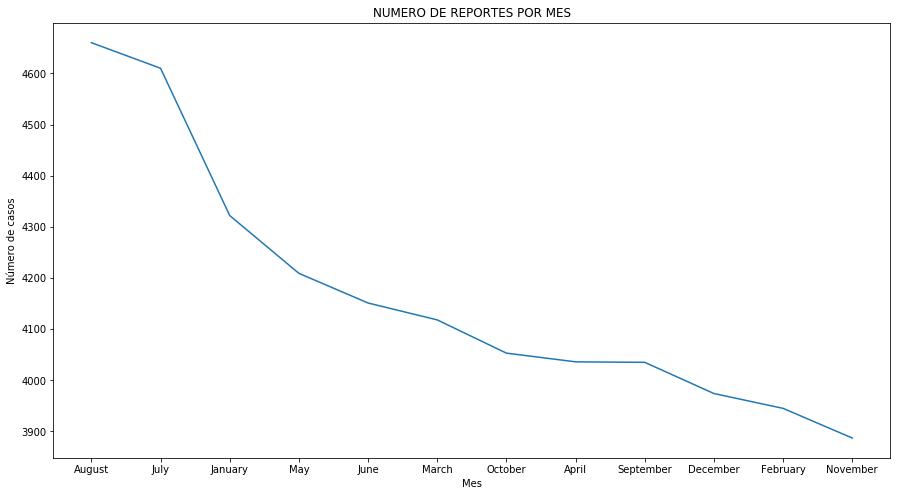

In [5]:
mes = dataframe["Month"].value_counts().sort_values(ascending=False)
print(mes)
figura_mes = plt.figure(figsize=(15,8))
ax = figura_mes.add_subplot(1, 1, 1)
ax.plot(mes)
ax.set_title('NUMERO DE REPORTES POR MES')
ax.set_xlabel('Mes')
ax.set_ylabel('Número de casos')

**Resultado:** Se puede observar que el mes donde se reportan mas casos es en Agosto (9,32% correspondiente a 4660 casos), en contraposicion con Noviembre donde se reportan menos casos (7,77% correspondiente a 3887 casos). Aunque se dice que Noviembre es el mes donde menos casos se reportan, la cantidad no deja de ser alarmante.

### Sexo de los involucrados (victimas y agresores) en los casos de homicidio/asesinato

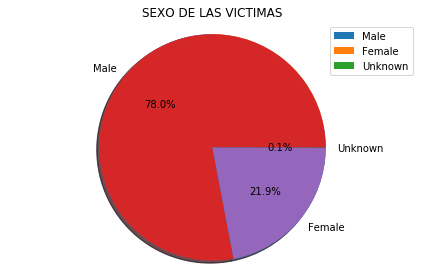

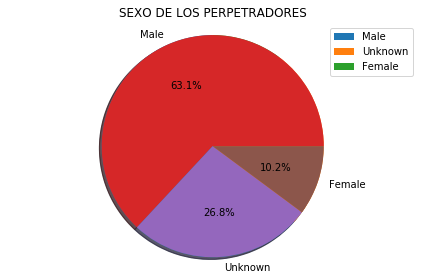

In [6]:
sexo_victima = dataframe["Victim Sex"].value_counts()
patches,texts=plt.pie(sexo_victima,shadow=True,startangle=90)
plt.pie(sexo_victima,shadow=True,labels=sexo_victima.index,autopct='%1.1f%%')
plt.legend(patches,sexo_victima.index,loc="best")
plt.axis("equal")
plt.title("SEXO DE LAS VICTIMAS")
plt.tight_layout()
plt.show()

sexo_agresor = dataframe["Perpetrator Sex"].value_counts()
patches,texts=plt.pie(sexo_agresor,shadow=True,startangle=90)
plt.pie(sexo_agresor,shadow=True,labels=sexo_agresor.index,autopct='%1.1f%%')
plt.legend(patches,sexo_agresor.index,loc="best")
plt.axis("equal")
plt.title("SEXO DE LOS PERPETRADORES")
plt.tight_layout()
plt.show()

**Resultado:** Tal como se observa, tanto como victima y perpetrador el sexo masculino es el que se pone por encima de los demas con un alarmante 78% siendo victima y un 63,1% siendo agresor. Le sigue el sexo femenino con 21,9% y 26,8% respectivamente.

### Tipo de crimen reportado
Dentro de los crimenes que se registran se tienen los asesinatos, homicidios y homicidios por negligencia

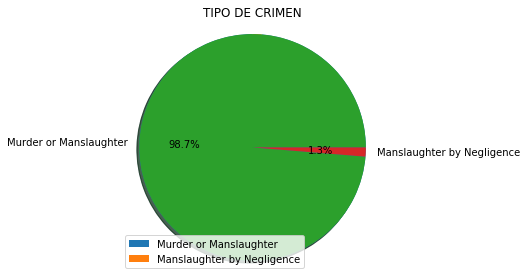

Asesinato u Homicidio: Murder or Manslaughter
Homicidio por negligencia: Manslaughter by Negligence


In [13]:
tipo_crimen = dataframe["Crime Type"].value_counts()
patches,texts=plt.pie(tipo_crimen,shadow=True,startangle=90)
plt.pie(tipo_crimen,shadow=True,labels=tipo_crimen.index,autopct='%1.1f%%')
plt.legend(patches,tipo_crimen.index,loc="best")
plt.axis("equal")
plt.title("TIPO DE CRIMEN")
plt.tight_layout()
plt.show()

print("Asesinato u Homicidio: Murder or Manslaughter")
print("Homicidio por negligencia: Manslaughter by Negligence")

**Resultado:** El homicidio por negligencia se presenta unicamente en el 1,3% de los casos mientras que el resto de incidentes se han producido por un asesinato o un homicidio. 

### Edades mas frecuentes de los involucrados (victima y perpetrador)

EDADES FRECUENTES EN VICTIMAS
25    2045
23    1826
24    1744
22    1725
26    1708
Name: Victim Age, dtype: int64


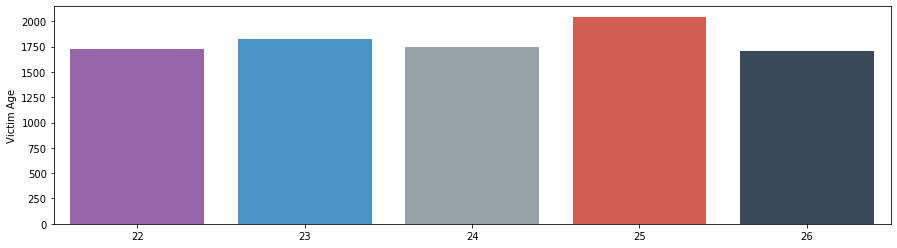

In [14]:
edad_victima = dataframe["Victim Age"].value_counts().head(5)
print("EDADES FRECUENTES EN VICTIMAS")
f,ax = plt.subplots(1,1,figsize=(15,4))
print(edad_victima)
ax = sns.barplot(edad_victima.index, edad_victima,palette=paleta)

**Resultado:** El rango de edad de las victimas se encuentra entre 20 a 30 años siendo la edad de 25 años la mas afectada por este tipo de crimenes con un total de 2045 casos registrados.

EDADES FRECUENTES EN PERPETRADORES
23    1546
25    1542
24    1515
20    1515
21    1511
Name: Perpetrator Age, dtype: int64


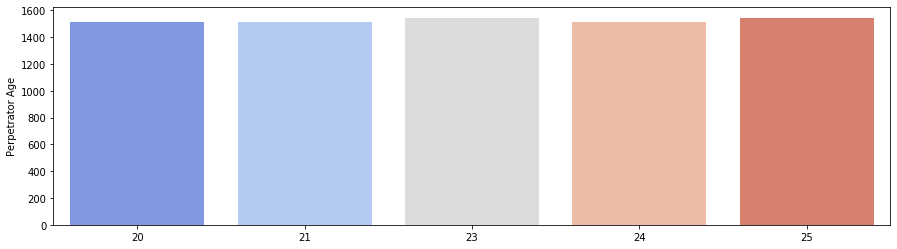

In [9]:
edad_perpetrador = dataframe["Perpetrator Age"].value_counts().head(6)
print("EDADES FRECUENTES EN PERPETRADORES")
del edad_perpetrador[0]
f,ax = plt.subplots(1,1,figsize=(15,4))
print(edad_perpetrador)
ax = sns.barplot(edad_perpetrador.index, edad_perpetrador,palette='coolwarm')

**Resultado:** En el caso de los perpetradores, el rango se mantiene al igual que el de las victimas siento 23 la edad que figura para un perpetrador en la mayoria de reportes analizados.

### ¿Cuantos de los 50000 casos se han resuelto?

NÚMERO DE CASOS RESUELTOS
Yes    36609
No     13391
Name: Crime Solved, dtype: int64


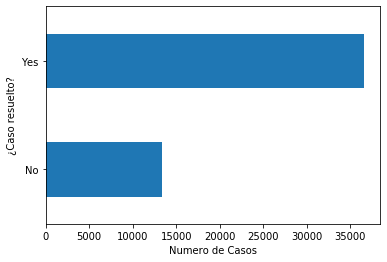

In [10]:
is_crimen_resuelto = dataframe["Crime Solved"].value_counts() 
print("NÚMERO DE CASOS RESUELTOS")
print(is_crimen_resuelto)
ax = is_crimen_resuelto.plot(kind="barh")
plt.xlabel('Numero de Casos'); 
plt.ylabel('¿Caso resuelto?'); 
ax.invert_yaxis() 

**Resultado:** A raiz del siguiente grafico podemos observar que un total de 36609 casos han sido resueltos mientras que 13391 no, lo que nos indica que un 26,78% de los casos registrados no se resuelven.

### Relacion entre victima y perpetrador

Unknown         17104
Acquaintance    11959
Stranger         8296
Wife             1985
Friend           1905
Name: Relationship, dtype: int64
Conocido/Conocida: Acquaintance


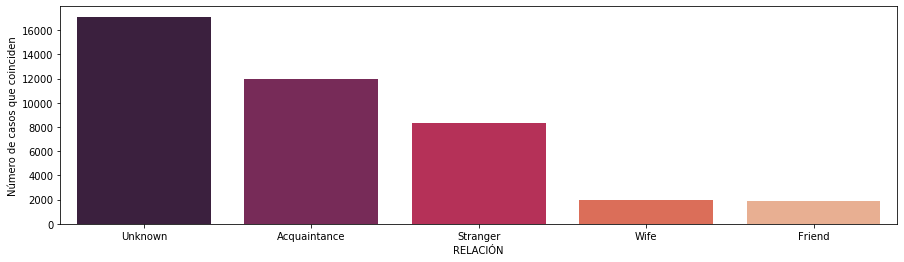

In [11]:
relacion = dataframe["Relationship"].value_counts().head(5)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(relacion.index, relacion, palette="rocket")
ax.set_ylabel("Número de casos que coinciden")
ax.set_xlabel("RELACIÓN")
print(relacion)
print("Conocido/Conocida: Acquaintance")


**Resultado:** Como se puede observar en el grafico, en la mayoria de casos (17104) no se conoce cual es la relacion entre victima y perpetrador. Que la victima o el perpetrador sea un conocido/conocida se encuentra en segundo lugar con 11959 casos correspondientes al 23,91%, en el siguiente pendaño tanto victima como perpetrador son extraños con 16,59% y las ultimas posiciones indican que victima o agresor son esposas o amigos/as con 3,97% y 3,81% respectivamente.

# CONCLUSIONES

* El estado que mayor numero de casos de homicidios/asesinatos tiene es California
* La segmentacion de los datos no se la realizó de manera randomica por lo que la mayoria de los resultados pertenecen a los años 1980 a 1982 segun se puede observar en el gráfico de años
* Los meses en los que se registra un mayor numero de reportes corresponden a la temporada de verano.
* Inicialmente se pensó que la mayoria de victimas podrían ser mujeres producto de un femicidio dado que la relacion predominante y conocida que se observa en las graficas es Esposa y el mayor numero de perpetradores son hombres. A medida que se analizó el grafico se cambió de parecer.

# BIBLIOGRAFÍA

[1] Murder Accountability Project, "Homicide Reports, 1980-2014", Kaggle.com, 2019. [En Linea]. Disponible en: https://www.kaggle.com/murderaccountability/homicide-reports. [Último Acceso: 10- Dic- 2019].

[2] Real Academia Española. (2001). Diccionario de la lengua española (22.a ed.). Consultado en http://www.rae.es/rae.html

[3] Wikipedia.org, "Homicidio Negligente", 2019. [En Linea]. Disponible en: https://es.wikipedia.org/wiki/Homicidio_negligente. [Último Acceso: 10- Dic- 2019].

In [12]:
# OTROS
def porcentaje(numero):
    return numero*100/50000;

groupby_arma = dataframe.groupby("Perpetrator Sex")["Weapon"].value_counts();

groupby_femicidio = dataframe.groupby(["Victim Sex", "Perpetrator Sex", "Relationship"])["Crime Solved"].value_counts()
print(groupby_arma)
edad_sexo = dataframe.groupby('Victim Sex')["Victim Age"]

Perpetrator Sex  Weapon       
Female           Handgun           2322
                 Knife             1387
                 Blunt Object       344
                 Shotgun            286
                 Rifle              261
                 Unknown            168
                 Firearm             85
                 Fire                65
                 Suffocation         61
                 Strangulation       32
                 Drowning            27
                 Gun                 15
                 Poison              12
                 Drugs                6
                 Fall                 5
                 Explosives           3
Male             Handgun          15176
                 Knife             5635
                 Blunt Object      3413
                 Shotgun           2951
                 Rifle             2071
                 Firearm            747
                 Unknown            522
                 Strangulation      348
         